# RFKO Chirp Diagram

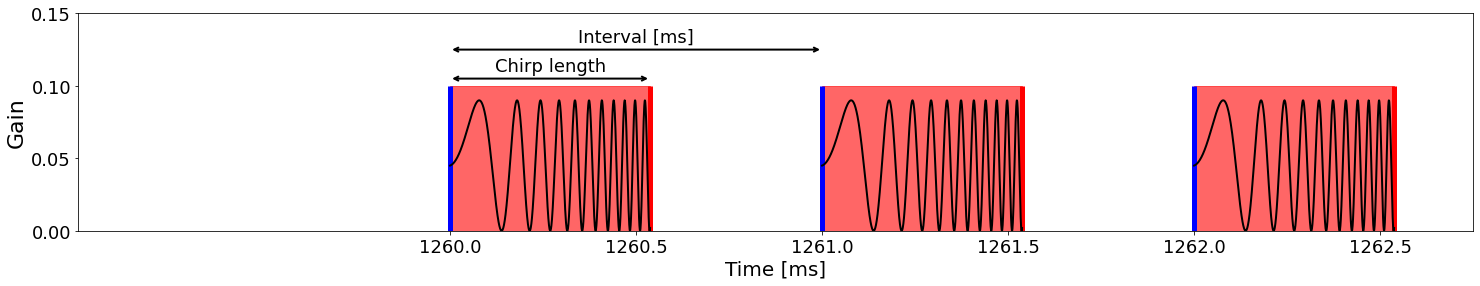

In [2]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,4))
start_t = 1260
interval_ms = 1
nb_of_acq = 100
accuracy = 256
time_one_turn = 2.1e-3  # in ms (The real time is 2.1e-6 [s])
chirp_frequency_range = 0.32, 0.34
excitation_strength = 0.5
gain = 0.1

end_t = start_t + nb_of_acq * interval_ms

intervals = np.arange(start_t, end_t, interval_ms)

# ax.axvline(start_t, marker="o")
# ax.axvline(end_t, marker="o")

for i in [0, 1, 2]:
    ax.vlines(intervals[i], 0, gain, color="b", lw=5)
    ax.vlines(intervals[i] + accuracy * time_one_turn, 0, gain, color="r", lw=5)

    rect = mpl.patches.Rectangle((intervals[i], 0), intervals[i] + accuracy * time_one_turn - intervals[i],
                                        gain, linewidth=1, edgecolor='r', facecolor='red', alpha=0.6)
    ax.add_patch(rect)

    if i == 0:
    
        x_start, x_end = intervals[i], intervals[i] + accuracy * time_one_turn
        y = gain + 0.005
        arrow_style = '<->'
        ax.annotate('', xy=(x_start, y), xytext=(x_end, y), arrowprops=dict(arrowstyle=arrow_style, linewidth=2))
        text = 'Chirp length'
        text_x = (x_start + x_end) / 2
        text_y = y + 0.005
        ax.annotate(text, xy=(text_x, text_y), ha='center', fontsize=18)

        x_start, x_end = intervals[i], intervals[i+1]
        y = gain + 0.025
        arrow_style = '<->'
        ax.annotate('', xy=(x_start, y), xytext=(x_end, y), arrowprops=dict(arrowstyle=arrow_style, linewidth=2))
        text = 'Interval [ms]'
        text_x = (x_start + x_end) / 2
        text_y = y + 0.005
        ax.annotate(text, xy=(text_x, text_y), ha='center', fontsize=18)    

    # Sine Wave with frequency increasing with time
    t = np.linspace(intervals[i], intervals[i] + accuracy * time_one_turn, 1000)
    f_start = chirp_frequency_range[0]
    f_end = 30 * chirp_frequency_range[1]
    f = np.linspace(f_start, f_end, 1000) + (t - intervals[i]) * (f_end - f_start) / (accuracy * time_one_turn)
    ax.plot(t, 0.9*gain/2 + 0.9*gain/2 * np.sin(2 * np.pi * f * (t - intervals[i])), color="k", lw=2)

ax.set_xlim(start_t - 1, start_t + 2 * interval_ms + 0.75)
ax.set_ylim(0.0, 0.15)
ax.set_xlabel("Time [ms]", fontsize = 20)
ax.set_ylabel("Gain", fontsize= 22)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
# ax.legend(fontsize=16)
# set the y-tick values
xticks = [1260, 1260.5,  1261, 1261.5, 1262, 1262.5]
ax.set_xticks(xticks);
yticks = [0, 0.05, 0.1, 0.15]
ax.set_yticks(yticks);
# ax.grid()
plt.savefig("rfko_chirp.png", facecolor='white', transparent=False, dpi = 150, bbox_inches='tight')